# **PCLab#1** - Group 10 - Clement Guyot de la Pommeraye, Erik Vader, Jacopo Cagnacci, Giacomo Bellodi

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import scipy
import seaborn as sns

## **Task 1**: Import the data and describe the sample

In [2]:
df = pd.read_csv('Data_PCLab1_Stock.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.13,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.35,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.25,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.73,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.80,194.449997,180.520004,26.760000,318.590851,1314.500000


In [3]:
#  Sort the stock data by date and print the number of stocks
df.sort_values(by='Date', inplace=True)
df.head()


,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.13,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.35,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.25,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.73,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.80,194.449997,180.520004,26.760000,318.590851,1314.500000


In [4]:
#Check if data contains any null values
print(df.isnull().sum())
print(f'The dataset contains {df.isnull().sum().sum()} null values.')

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64
The dataset contains 0 null values.


In [5]:
#What is the average market value of the S&P500 ?
df['sp500'].mean() #take the mean of the s&p500 column
print(f'The average market value of the S&P500 is ${df["sp500"].mean():.2f}')

The average market value of the S&P500 is $2218.75


In [6]:
# Which stock or index has the minimum dispersion?

df_no_date = df.drop(columns=['Date'])
print('Stock and index standard deviaitons:')
print(df_no_date.std())
df_no_date.std().idxmin()


print('The stock or index with the minimum dispersion is:', df_no_date.std().idxmin(),":", df_no_date.std().min())

#in dollar value:
# Dispersion in dollar value: std * mean for each stock/index
dispersion_dollar = df_no_date.std() * df_no_date.mean()
print('Dispersion in dollar value for each stock/index:')
print(dispersion_dollar)
min_dispersion_stock = dispersion_dollar.idxmin()
print(f'The stock or index with the minimum dispersion in dollar value is: {min_dispersion_stock}: ${dispersion_dollar[min_dispersion_stock]:.2f}')

Stock and index standard deviaitons:
AAPL      70.827601
BA       103.678586
T          3.207490
MGM        6.963847
AMZN     697.838905
IBM       25.561938
TSLA     210.988003
GOOG     334.448057
sp500    537.321727
dtype: float64
The stock or index with the minimum dispersion is: T : 3.2074898522656103
Dispersion in dollar value for each stock/index:
AAPL     9.973930e+03
BA       1.969299e+04
T        1.127846e+02
MGM      1.609049e+02
AMZN     6.389871e+05
IBM      4.137276e+03
TSLA     5.477266e+04
GOOG     2.621111e+05
sp500    1.192182e+06
dtype: float64
The stock or index with the minimum dispersion in dollar value is: T: $112.78


In [7]:
# What is the maximum price for Amazon stock over the specified time period ?
df['AMZN'].max()
print(f'The maximum price for Amazon stock over the specified time period is ${df["AMZN"].max():.2f} on the {df["Date"][df["AMZN"].idxmax()]}.')

The maximum price for Amazon stock over the specified time period is $3225.00 on the 2020-08-06 00:00:00.


## **Task 2**: Plot the data

In [8]:
# Define a function to plot the entire dataframe

def plot_figure(dataframe):
    plt.figure(figsize=(12, 8))
    for column in dataframe.columns:
        if column != 'Date':
            plt.plot(dataframe['Date'], dataframe[column], label=column)
    plt.xlabel('DATE')

    if dataframe.equals(df):
         plt.title('RAW STOCK PRICES (WITHOUT NORMALIZATION)')
         plt.ylabel('PRICE ($)')
    elif dataframe.equals(norm_df):
         plt.title('NORMALIZED STOCK PRICES')
         plt.ylabel('NORMALIZED PRICE ($)')

    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

    plt.legend()
    plt.tight_layout()
    plt.show()


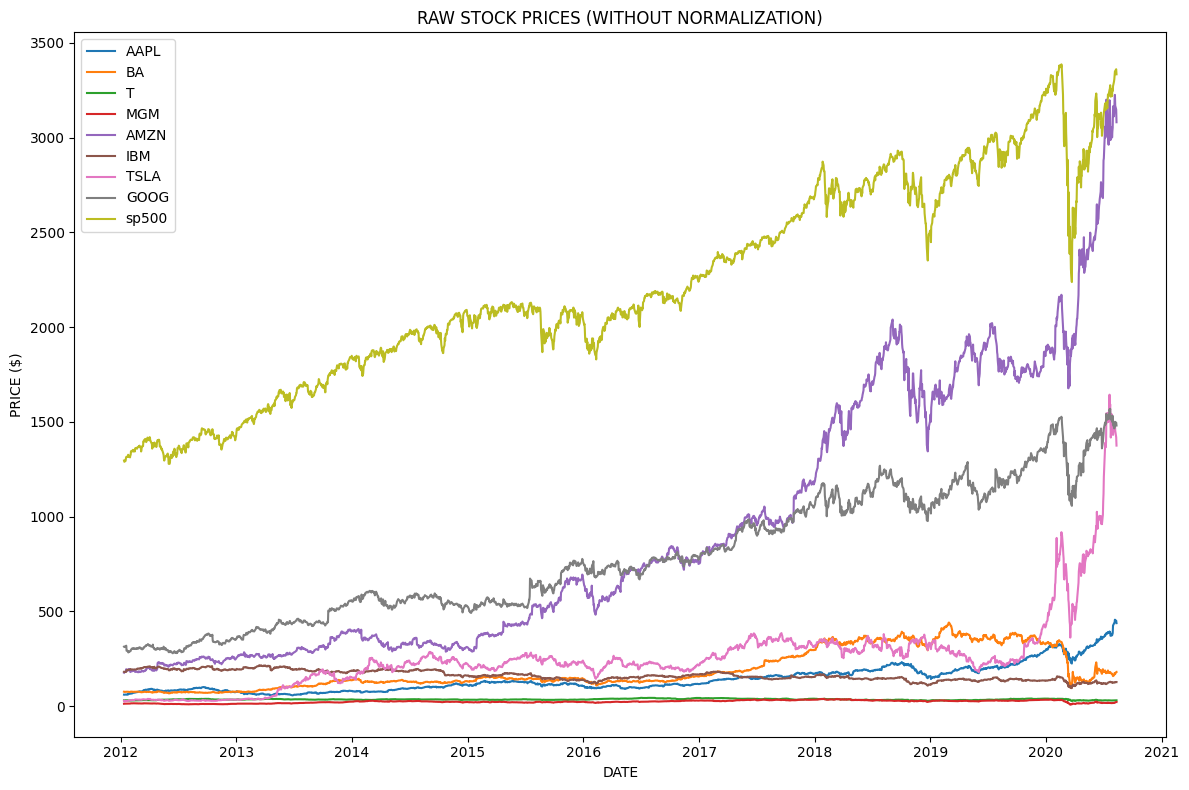

In [9]:
plot_figure(df)

## **Task 3:** Print out normalized (scaled) stock prices

In [10]:
# Define a function to normalize the prices based on the initial price

def normalize_prices(dataframe):
    df_normalized = dataframe.copy()
    for column in df_normalized.columns:
        if column != 'Date':
            df_normalized[column] = df_normalized[column] / df_normalized[column].iloc[0]
    return df_normalized

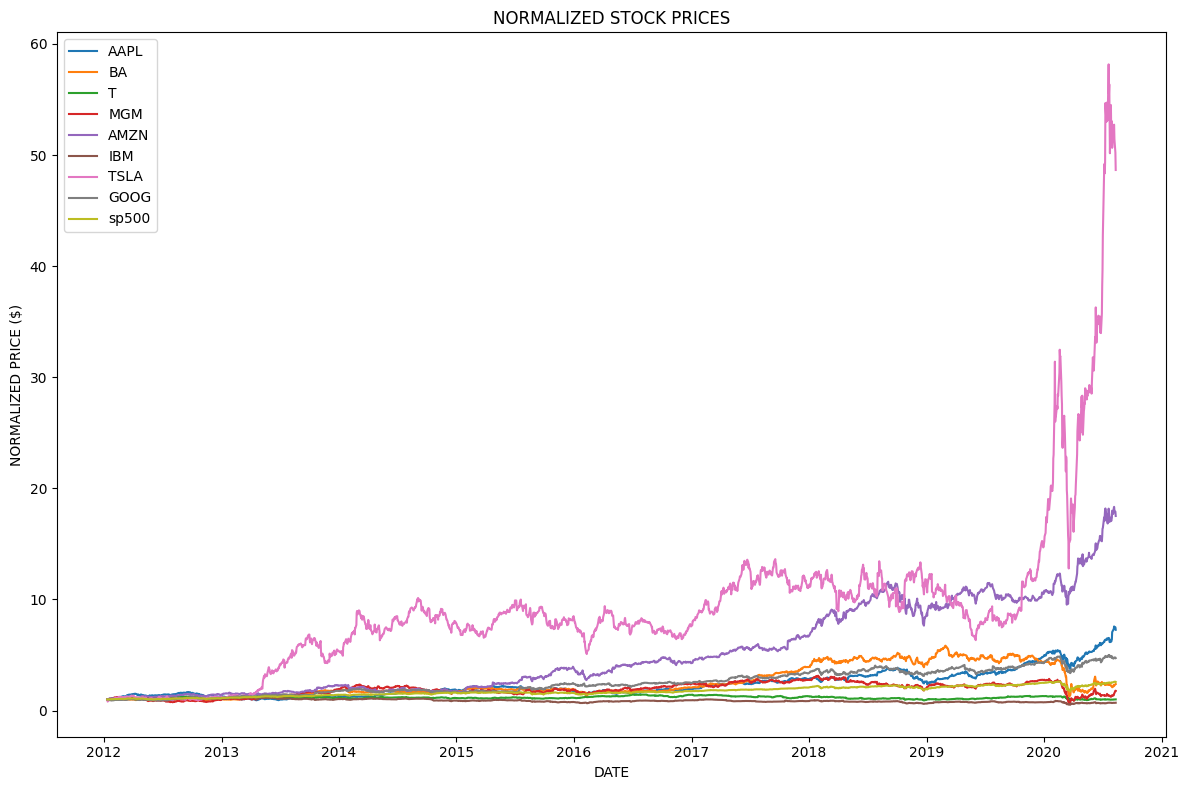

In [11]:
norm_df = normalize_prices(df)
plot_figure(norm_df)

In [12]:
# INTERACTIVE PLOTTING WITH PLOTLY EXPRESS
import plotly.express as px
fig = px.line(norm_df, x='Date', y=df.columns.drop('Date'), title='Stock Prices Over Time (Normalized)')
fig.update_layout(xaxis_title='Date', yaxis_title='Normalized Price ($)')
fig.show()


In [13]:
#interactive plotting with option to slice over time, select linear or log

import plotly.express as px

fig = px.line(
    norm_df,
    x="Date",
    y=norm_df.columns.drop("Date"),
    title="Stock Prices Over Time (Normalized)",
)

fig.update_layout(
    title={
        "x": 0.5,  # center the title
        "xanchor": "center",
        "yanchor": "top",
        "font": dict(size=20)
    },
    xaxis_title="Date",
    yaxis_title="Normalized Price ($)",
    legend_title="Ticker",
    hovermode="x unified",
    margin=dict(l=60, r=20, t=60, b=40),
    template="plotly_white"
)

# Add rangeslider and buttons for zooming
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=6,  step="month", stepmode="backward", label="6M"),
            dict(count=1,  step="year",  stepmode="backward", label="1Y"),
            dict(count=3,  step="year",  stepmode="backward", label="3Y"),
            dict(step="all", label="All")
        ])
    )
)

# Add linear/log options for prices (y-axis)
fig.update_layout(
    updatemenus=[dict(
        type="buttons",
        direction="right",
        x=1.0, y=1.15,
        xanchor="right", yanchor="top",
        buttons=[
            dict(label="Linear", method="relayout", args=[{"yaxis.type": "linear"}]),
            dict(label="Log",    method="relayout", args=[{"yaxis.type": "log"}])
        ]
    )]
)

fig.show()


##  **TASK 5**: Calculate Stock returns (1)

In [14]:
# Define a function to calculate stocks daily returns (for all stocks)
def calculate_daily_returns(dataframe):
    df_returns = dataframe.copy()
    for column in df_returns.columns:
        if column != 'Date':
            df_returns[column] = df_returns[column].pct_change()  # Calculate daily returns
    df_returns.dropna(inplace=True)  # Remove NaN values resulting from pct_change
    return df_returns

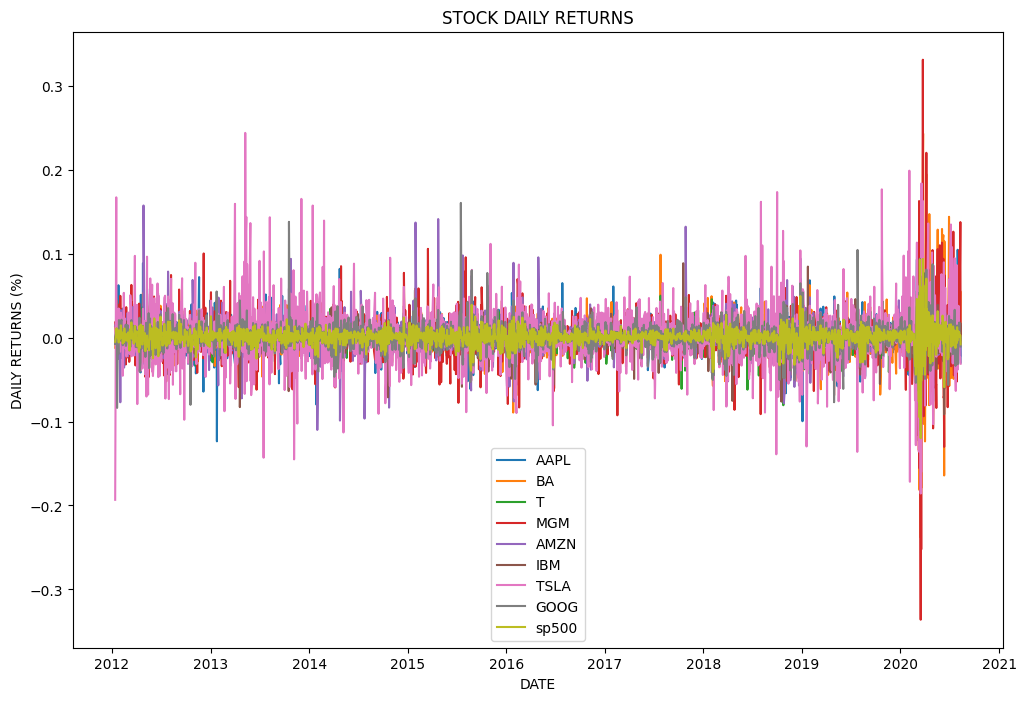

In [15]:
df_returns = calculate_daily_returns(df)

#plot the daily returns over time

plt.figure(figsize=(12, 8))
for column in df_returns.columns:
    if column != 'Date':
        plt.plot(df_returns['Date'], df_returns[column], label=column)  # Plot daily returns
plt.xlabel('DATE')
plt.title('STOCK DAILY RETURNS')
plt.ylabel('DAILY RETURNS (%)')
plt.legend()
plt.show()




## **Task 5**: Calculate stock returns (2)

In [16]:

# Calculate the correlations between daily returns
corr_table = df_returns.drop(columns=['Date']).corr()
corr_table

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
AAPL,1.000000,0.385249,0.341373,0.384088,0.410233,0.434534,0.288534,0.509124,0.657320
BA,0.385249,1.000000,0.401602,0.554229,0.267466,0.479264,0.250946,0.388048,0.641826
T,0.341373,0.401602,1.000000,0.340166,0.233145,0.484219,0.152515,0.353695,0.617463
MGM,0.384088,0.554229,0.340166,1.000000,0.309016,0.441631,0.311879,0.439141,0.631449
AMZN,0.410233,0.267466,0.233145,0.309016,1.000000,0.339589,0.310083,0.575283,0.539560
IBM,0.434534,0.479264,0.484219,0.441631,0.339589,1.000000,0.245610,0.458816,0.703935
TSLA,0.288534,0.250946,0.152515,0.311879,0.310083,0.245610,1.000000,0.322804,0.387920
GOOG,0.509124,0.388048,0.353695,0.439141,0.575283,0.458816,0.322804,1.000000,0.684571
sp500,0.657320,0.641826,0.617463,0.631449,0.539560,0.703935,0.387920,0.684571,1.000000


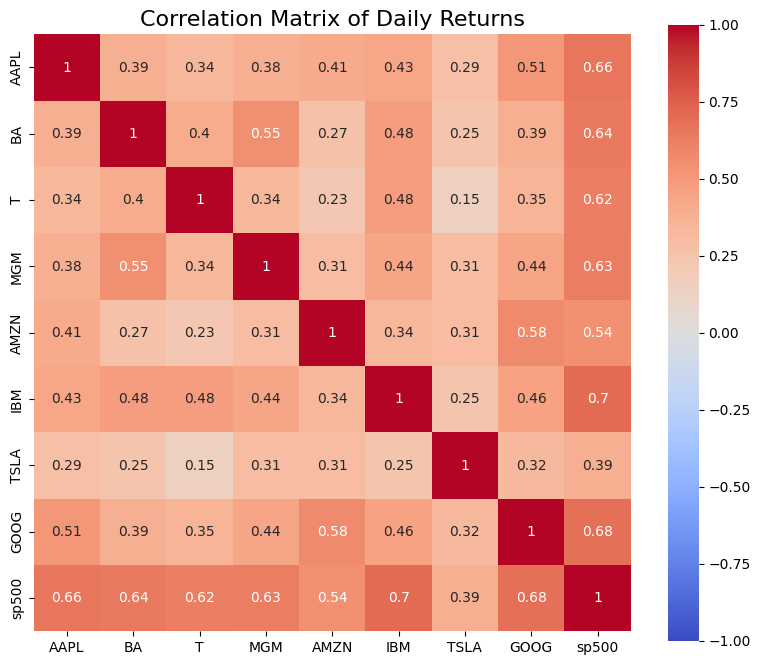

In [17]:
import numpy as np
plt.figure(figsize=(8, 8))
ax = sns.heatmap(
    corr_table,
    vmin=-1, vmax=1,
    cmap="coolwarm",
    annot= True,
    cbar_kws={"shrink": .8},
    square=True
)

ax.set_title("Correlation Matrix of Daily Returns", fontsize=16)
plt.tight_layout()
plt.show()


In [18]:
# top 2 stocks correlated with S&P500
corr_with_sp500 = corr_table['sp500'].drop('sp500')  # Exclude self-correlation
top_2_stocks = corr_with_sp500.abs().sort_values(ascending=False).head(2)
print(f'The 2 stocks with the highest correlation to the S&P500 are:\n{top_2_stocks}')

The 2 stocks with the highest correlation to the S&P500 are:
IBM     0.703935
GOOG    0.684571
Name: sp500, dtype: float64


In [19]:
# What is the correlation between Amazon and Boeing ?
corr_amzn_boeing = corr_table.loc['AMZN', 'BA']
print(f'The correlation between Amazon and Boeing is: {corr_amzn_boeing:.2f}')

# What is the correlation between MGM and Boeing ?
corr_mgm_boeing = corr_table.loc['MGM', 'BA']
print(f'The correlation between MGM and Boeing is: {corr_mgm_boeing:.2f}')

The correlation between Amazon and Boeing is: 0.27
The correlation between MGM and Boeing is: 0.55


 **Amazon–Boeing (ρ = 0.27)**. The low–moderate positive correlation likely reflects that they’re both exposed to the broad market, while their core drivers differ (tech/e-commerce/cloud vs. aerospace/defense). That mix creates a diversification opportunity.

 **MGM–Boeing (ρ = 0.55)**. The higher, moderate correlation makes sense given their shared exposure to cyclical, travel-linked forces. When the economy, employment, and consumer confidence improve, air travel and leisure spending tend to rise together: airlines add capacity and firm up profitability (supporting aircraft demand for Boeing), while hotel/casino demand, room rates, and convention traffic lift MGM. That said, Boeing’s defense business introduces idiosyncratic drivers MGM doesn’t share, which keeps the correlation from being even higher.

Overall, this higher ρ versus Amazon–Boeing means MGM is a weaker diversifier alongside Boeing.


## **Task 5** : Calculate stock returns (3)

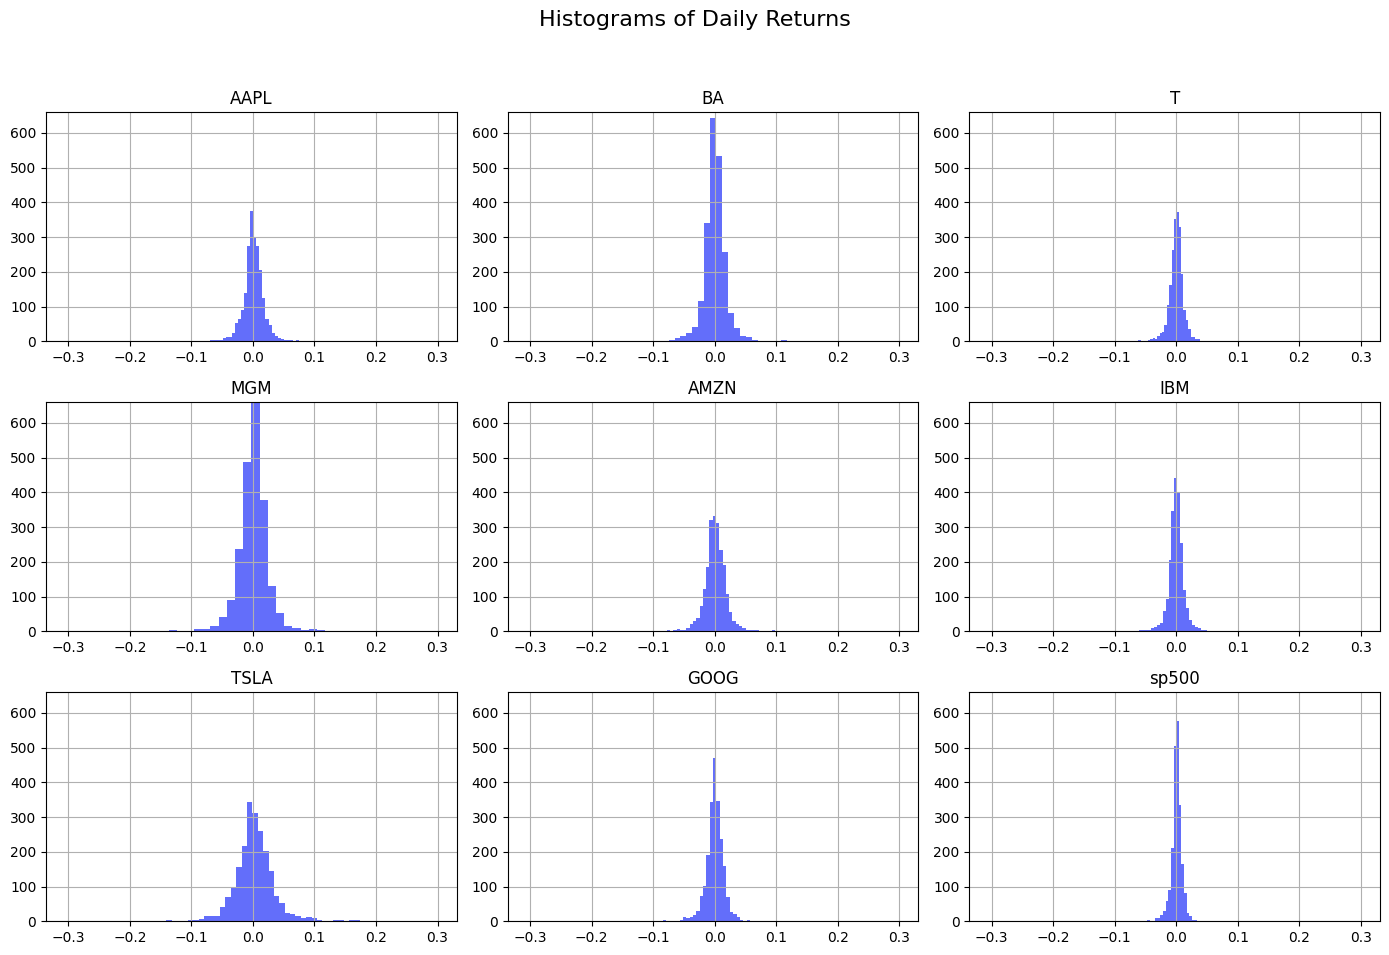

In [20]:
data = df_returns.drop(columns=['Date'])

# compute global x-axis limits across all stocks
xmin = data.min().min()
xmax = data.max().max()

# plot histograms with same x-axis scale
axes = data.hist(
    bins=50,
    figsize=(14, 10),
    grid=True,
    color='#636efa'
)

# align x-axis and y-axis and make them equal for each table.
for ax in axes.flatten():
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(0, data.apply(lambda c: np.histogram(c, bins=50)[0].max()).max())

plt.suptitle('Histograms of Daily Returns', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [21]:
#interatctive plot with figure factory

import plotly.figure_factory as ff

def plot_interactive(df_returns: pd.DataFrame, columns=None, title="Interactive Graph of Daily Returns"):
    tickers = df_returns.columns.drop('Date', errors='ignore')
    if columns is None:
        columns = list(tickers)

    # data for figure factory
    data = [df_returns[c].dropna().values for c in columns]
    labels = columns

    # KDE-only (no hist bars), no rugs
    fig = ff.create_distplot(
        hist_data=data,
        group_labels=labels,
        show_hist=False,
        show_rug=False,
        curve_type="kde"
    )

    # layout + legend behavior
    fig.update_layout(
        template="plotly_white",
        title=title,
        legend_title_text="Ticker (click=toggle, double-click=isolate)",
        hovermode="x",
        margin=dict(l=50, r=20, t=60, b=50),
        legend_itemclick="toggle",             # single click show/hide
        legend_itemdoubleclick="toggleothers"  # double-click isolate
    )

    # axes + zero line
    fig.update_xaxes(title="Daily Return", rangeslider_visible=True)
    fig.update_yaxes(title="Probability")
    fig.add_vline(x=0, line_dash="dash", opacity=0.6)

    # hover shows only the probability value
    fig.update_traces(
        line=dict(width=2),
        hovertemplate="%{fullData.name}<br>Probability=%{y:.4f}<extra></extra>"
    )

    return fig


In [22]:
#click on the legend ticker to remove or add from the plot the return's distribution
#double click to isolate
fig = plot_interactive(df_returns, columns=["AAPL","T","TSLA","MGM","BA","IBM","AMZN","GOOG","sp500"])
fig.show()



The S&P 500 daily return distribution is narrower and more tightly centered around zero than those of the individual stocks. That’s expected: the index is a broad, value-weighted portfolio, so with less-than-perfect correlations across constituents, idiosyncratic shocks partly diversify away, reducing overall volatility. In our sample, this produces lower dispersion than any of the eight single names plotted.

##  **Task 6**: Porfolio weights

Write a function that will:
    Simulate 1000 portfolios with random weights

*   Simulate 1000 portfolios with random weights

*   Compute the return, the variance and the Sharpe ratio of each portfolio


* Return the maximum Sharpe ratio and its weights

In [23]:

def simulate_portfolio_weights(df, num_sims = 1000, risk_free_rate = 0.00):


    np.random.seed(42)  # For reproducibility

    # Exclude helper columns if they exist
    drop_cols = [c for c in ['Date', 'sp500'] if c in df.columns]
    tickers = df.columns.drop(drop_cols)
    n = len(tickers)

    mean_returns = df[tickers].mean().values * 252    # annualized means as numpy array
    cov_matrix = df[tickers].cov().values * 252  # Annualized covariance matrix
    results = np.zeros((num_sims, 3 + n))  # array for return, volatility, Sharpe ratio, weights


# It loops num_sims times, each time drawing random asset weights, normalizing them to sum to 1 (fully invested),
# then computing the portfolio’s return (w·μ), volatility (√(wᵀΣw)), and Sharpe ratio ((return − rf)/vol).
# Each iteration stores those three metrics plus the weights in results, so you can later identify the portfolio with the highest Sharpe.

    for i in range(num_sims):
        weights = np.random.random(n)
        weights /= weights.sum()  # Normalize to sum to 1
        portfolio_return = weights @ mean_returns
        portfolio_volatility = np.sqrt(weights @ cov_matrix @ weights)
        sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
        results[i, :3] = [portfolio_return, portfolio_volatility, sharpe_ratio]
        results[i, 3:] = weights

    columns = ['Return', 'Volatility', 'Sharpe Ratio'] + list(tickers)
    results_df = pd.DataFrame(results, columns=columns)

    i_best = int(results_df['Sharpe Ratio'].idxmax())
    max_stats = results_df.loc[i_best, ['Return', 'Volatility', 'Sharpe Ratio']]
    max_weights = results_df.loc[i_best, tickers].rename('weights')

    return max_stats, max_weights, results_df

In [24]:
print("The portfolio with the maximum Sharpe ratio reported the following stats:")
max_stats, max_w, results_df = simulate_portfolio_weights(df_returns, num_sims = 10000, risk_free_rate = 0.00) #decided to run 10000 vs 1000 to obtain similar output in the slides.
print(max_stats.round(4))
print((max_w * 100).round(2).astype(str) + "%")

The portfolio with the maximum Sharpe ratio reported the following stats:
Return          0.3613
Volatility      0.2543
Sharpe Ratio    1.4208
Name: 1920, dtype: float64
AAPL    26.71%
BA       1.48%
T        4.11%
MGM      2.48%
AMZN    25.38%
IBM      0.32%
TSLA    25.94%
GOOG    13.58%
Name: weights, dtype: object


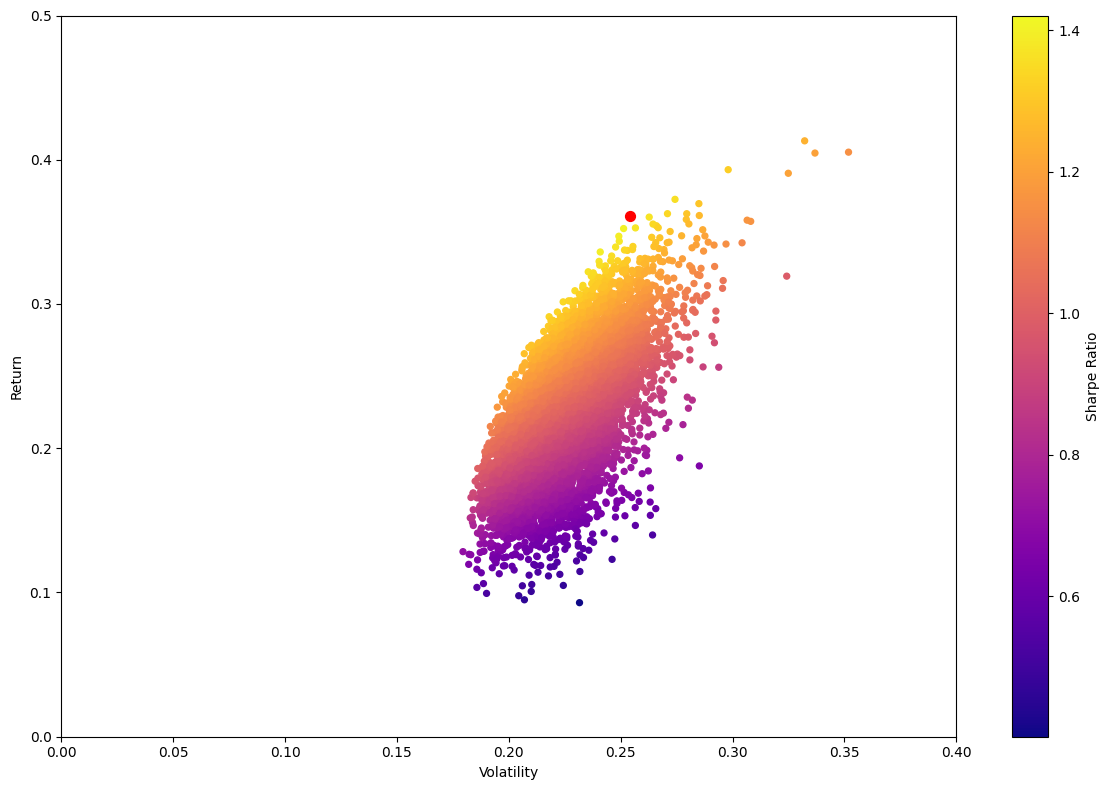

In [25]:
#Plot

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

sc = plt.scatter(
    results_df["Volatility"],
    results_df["Return"],
    c=results_df["Sharpe Ratio"],
    cmap="plasma",
    s=18
)

# colorbar and labels
cb = plt.colorbar(sc)
cb.set_label("Sharpe Ratio")

plt.xlabel("Volatility")
plt.ylabel("Return")

# highlight the max-Sharpe (tangency) portfolio
plt.scatter(
    max_stats["Volatility"],
    max_stats["Return"],
    c="red",
    s=50
)
plt.xlim(0,0.4) #forced the x axis to start at zero
plt.ylim(0,0.5) #forced the y axis to start at zero
plt.tight_layout()
plt.show()


Define a function that finds the weights that minimize the variance for all possible level or return (i.e., that draw the efficient frontier).

In [26]:

from scipy.optimize import minimize

#remember to add comments
def efficient_frontier(df_returns, n_points):

    #assure to remove Date column
    tickers = df_returns.columns.drop(['Date', 'sp500']) # We exclude the S&P 500 as it is already a portfolio of multiple stocks
    daily_return = df_returns[tickers]

    #compute annualized mean returns and covariance matrix
    mean_returns = daily_return.mean().values * 252    # annualized means as numpy
    cov_matrix = daily_return.cov().values * 252  # Annualized covariance matrix

    n = len(tickers)


    #build a grid of returns between the lowest and highest mean returns of the stocks
    ret_min, ret_max = mean_returns.min(), mean_returns.max()
    target_returns = np.linspace(ret_min, ret_max, n_points)

    #define function that computes the portfolio variance
    def portfolio_variance(weights, cov_matrix):
        return weights @ cov_matrix @ weights

    #define function to ensure weights sum to 1
    def sum_to_one(weights):
        return np.sum(weights)-1

    def target_return(weights, mean, target):
        return weights @ mean - target
    #define bounds
    bounds = [(0,1)]*n # No short selling allowed = no negative weights
    w0 = np.full(n, 1/n) #initial guess: equal weights

    #store the results
    frontier_returns = []
    frontier_volatilities = []
    weights_store = []

    for target in target_returns:
        #ensure the constraints are respected
        constraints = ({'type': 'eq', 'fun': sum_to_one},
                       {'type': 'eq', 'fun': target_return, 'args': (mean_returns, target)})

        #optimization -> minimize the portfolio variance
        #comment more
        result = minimize(portfolio_variance, w0, args = (cov_matrix,), method='SLSQP', bounds = bounds , constraints=constraints)
        if result.success:
            weights = result.x
            weights_store.append(weights)
            return_ = weights @ mean_returns
            volatility = np.sqrt(weights @ cov_matrix @ weights)
            frontier_returns.append(return_)
            frontier_volatilities.append(volatility)
            w0 = weights  #use the previous weights as the initial guess for the next iteration

        #build DF with results
        frontier = pd.DataFrame({
        'Return': np.array(frontier_returns),
        'Volatility': np.array(frontier_volatilities)
    })

    return frontier, weights_store, list(tickers)


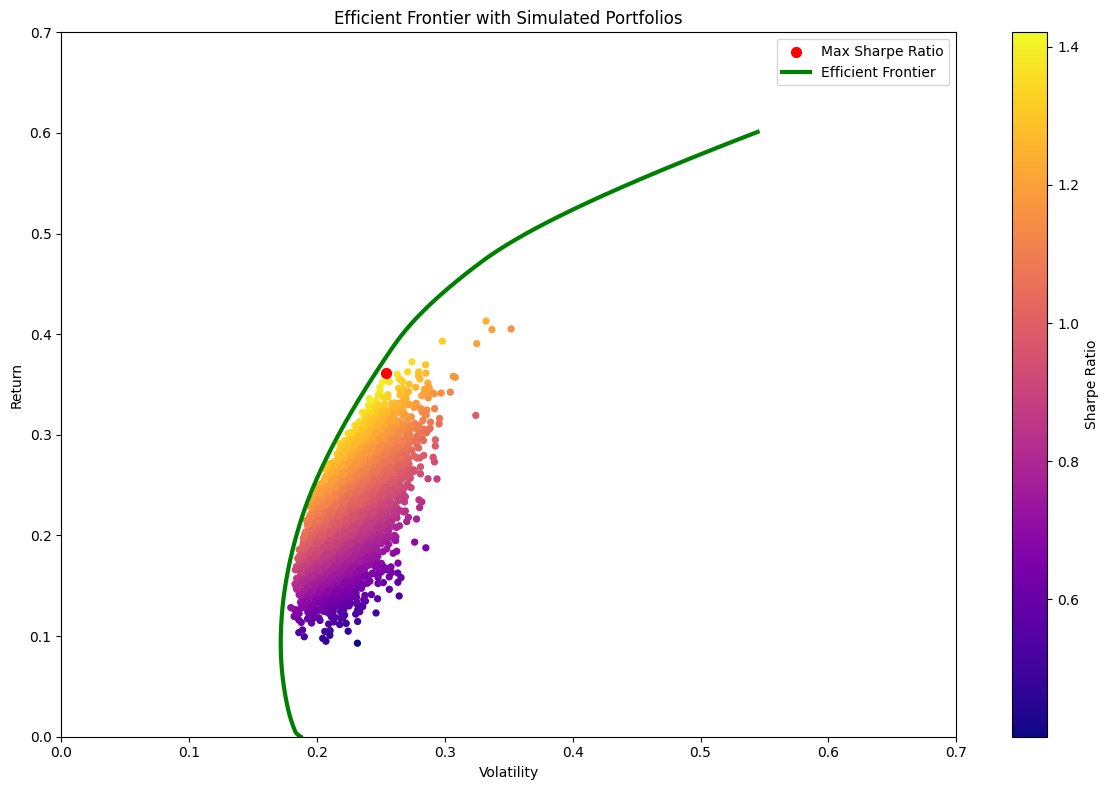

In [27]:
frontier, w_list, tickers = efficient_frontier(df_returns, n_points=1000)
frontier = frontier[frontier['Return'] > 0] #remove negative returns

plt.figure(figsize=(12, 8))

# scatter of simulated portfolios
sc = plt.scatter(
    results_df['Volatility'],
    results_df['Return'],
    c=results_df['Sharpe Ratio'],
    cmap='plasma',
    s=18
)
cb = plt.colorbar(sc)
cb.set_label("Sharpe Ratio")

plt.xlabel("Volatility")
plt.ylabel("Return")

# highlight max Sharpe portfolio with red dot
plt.scatter(
    max_stats["Volatility"],
    max_stats["Return"],
    c="red",
    s=50,
    label="Max Sharpe Ratio"
)

# draw efficient frontier curve
plt.plot(
    frontier['Volatility'],
    frontier['Return'],
    color="green",
    linewidth=3,
    label="Efficient Frontier"
)

plt.xlim(0.00, 0.70) #include axis orgin
plt.ylim(0.00, 0.70) #include axis origin
plt.title("Efficient Frontier with Simulated Portfolios")
plt.legend()
plt.tight_layout()
plt.show()


We can see that while the optimal portfolio is not the one the closest to the frontier line (e.g. some scenario with a return of ~0.25 are closer), the red dot lies close to where the tangency portfolio would be.

## **Task7**: Testing Portfolio Theory

In [28]:
df_returns.head()

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
1,2012-01-13,-0.003749,-0.012051,-0.001660,0.018137,0.014153,-0.007699,-0.193274,-0.007385,-0.004948
2,2012-01-17,0.011648,0.008579,0.005986,-0.008097,0.018159,0.004689,0.167179,0.005744,0.003553
3,2012-01-18,0.010384,-0.002392,0.002645,0.039184,0.042827,0.005944,0.007895,0.006889,0.011108
4,2012-01-19,-0.003169,0.006661,0.002967,0.005499,0.026446,-0.003038,-0.001865,0.010523,0.004939
5,2012-01-20,-0.017417,-0.000529,0.002959,-0.012500,-0.018102,0.044316,-0.005979,-0.083775,0.000669


In [29]:
# consider only years 2012-2016

df_returns_1216 = df_returns[(df_returns['Date'] >= '2012-01-01') & (df_returns['Date'] <= '2016-12-31')]

#run the portfolio simulation on this sub-period
print("Over the period 2012-2016, the portfolio with the maximum Sharpe ratio reported the following stats:")
max_stats, max_w, results_df = simulate_portfolio_weights(df_returns_1216, num_sims = 1000, risk_free_rate = 0.00)
print(max_stats.round(4))
print((max_w * 100).round(2).astype(str) + "%")

Over the period 2012-2016, the portfolio with the maximum Sharpe ratio reported the following stats:
Return          0.2846
Volatility      0.1998
Sharpe Ratio    1.4250
Name: 868, dtype: float64
AAPL    14.81%
BA      19.96%
T        3.57%
MGM      5.98%
AMZN    23.08%
IBM      0.53%
TSLA    19.68%
GOOG    12.39%
Name: weights, dtype: object


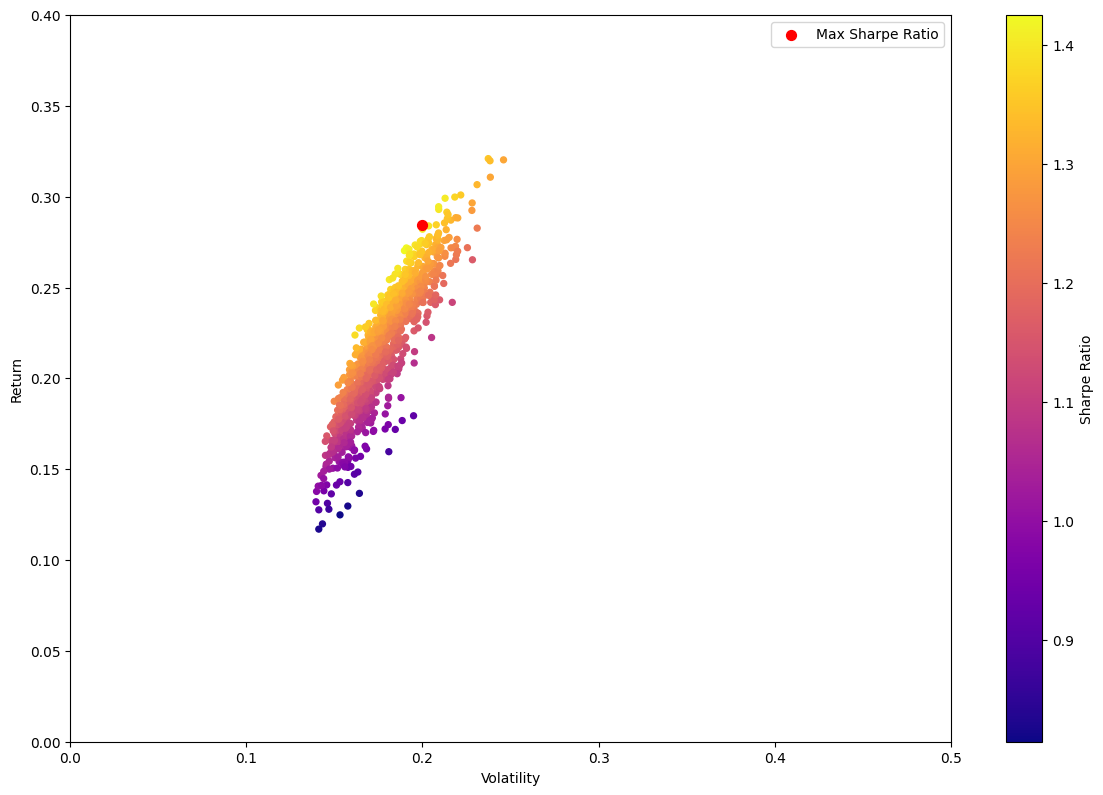

In [30]:
plt.figure(figsize=(12, 8))
sc = plt.scatter(results_df['Volatility'], results_df['Return'],
                 c=results_df['Sharpe Ratio'], cmap='plasma', s=18)
plt.colorbar(sc).set_label("Sharpe Ratio")
plt.xlabel("Volatility"); plt.ylabel("Return")
plt.scatter(max_stats["Volatility"], max_stats["Return"], c="red", s=50, label="Max Sharpe Ratio")
plt.legend(); plt.tight_layout()
plt.xlim(0.00, 0.50)
plt.ylim(0.00, 0.40)
plt.show()

Test the expected returns (2012-2016) vs Realized Returns (2016-2020)

In [31]:
#change the comparison between the expected and realized performance - add 2012-2016 simulated portfolio vs 2017-2020 actual performance with equal weights.

#split the data

df_1216 = df_returns[(df_returns['Date'] >= '2012-01-01') & (df_returns['Date'] <= '2016-12-31')] #train data from 2012 to 2016(end)
df_1720 = df_returns[(df_returns['Date'] >= '2017-01-01')] #test data from 2017 to end of dataset
df_1216.drop(columns=['Date', 'sp500'], inplace=True) #remove date and sp500
df_1720.drop(columns=['Date', 'sp500'], inplace=True) #remove date and sp500

#recall the optimal weights compute previously for the training period

w = max_w.values
portfolio_eq = np.array([1/8] * 8)

#Expected returns and volatility

mean_returns = df_1216.mean().values * 252    # annualized means
cov_matrix = df_1216.cov().values * 252  # Annualized covariance matrix

opt_exp_returns_1216 = mean_returns @ w
opt_exp_volatility_1216 = np.sqrt(w @ cov_matrix @ w)

#With equal weights portfolio
eq_exp_returns_1216 = mean_returns @ portfolio_eq
eq_exp_volatility_1216 = np.sqrt(portfolio_eq @ cov_matrix @ portfolio_eq)

print("Optimal (2012–2016):  Return = {:.2%}, Vol = {:.2%}".format(opt_exp_returns_1216, opt_exp_volatility_1216))
print("Equal-Weight (expected from 2012–2016):  Return = {:.2%}, Vol = {:.2%}".format(eq_exp_returns_1216, eq_exp_volatility_1216 ))


Optimal (2012–2016):  Return = 28.46%, Vol = 19.98%
Equal-Weight (expected from 2012–2016):  Return = 21.64%, Vol = 16.97%


In [32]:
#Realized returns and volatility with optimal simulated weights

daily_portfolio_ret = df_1720.values @ w
opt_annual_realized_ret = daily_portfolio_ret.mean() * 252
opt_annual_realized_vol = np.std(daily_portfolio_ret) * np.sqrt(252)


#With equal weights portfolio
eq_daily_portfolio_returns = df_1720.values @ portfolio_eq
eq_annual_realized_returns = eq_daily_portfolio_returns.mean() * 252
eq_annual_realized_volatility = np.std(eq_daily_portfolio_returns) * np.sqrt(252)

print("Equal-Weight (2017–2020):  Return = {:.2%}, Vol = {:.2%}".format(eq_annual_realized_returns, eq_annual_realized_volatility))
print("Optimal (2017–2020):  Return = {:.2%}, Vol = {:.2%}".format(opt_annual_realized_ret, opt_annual_realized_vol))


Equal-Weight (2017–2020):  Return = 23.71%, Vol = 27.04%
Optimal (2017–2020):  Return = 36.01%, Vol = 29.43%


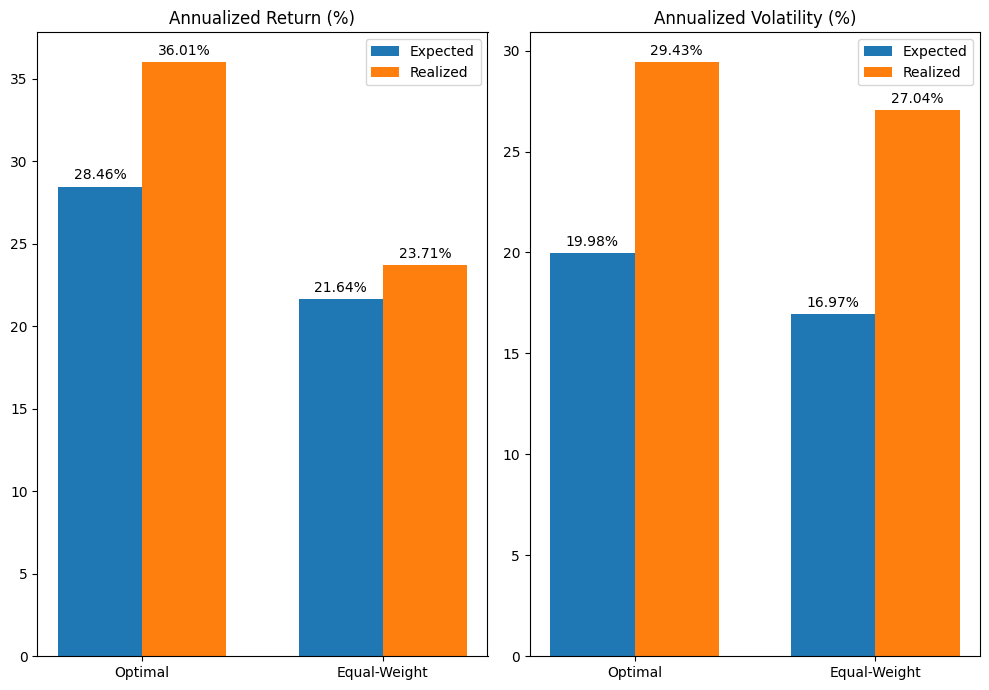

In [33]:
# Bars Charts: Expected vs Realized (Returns & Volatility)

fig, ax = plt.subplots(1, 2, figsize=(10,7))

labels = ['Optimal', 'Equal-Weight']
x = np.arange(len(labels)); w_bar = 0.35

# Returns
exp_returns = [opt_exp_returns_1216*100, eq_exp_returns_1216*100]
real_returns = [opt_annual_realized_ret*100, eq_annual_realized_returns*100]

bars1 = ax[0].bar(x - w_bar/2, exp_returns,  width=w_bar, label='Expected')
bars2 = ax[0].bar(x + w_bar/2, real_returns, width=w_bar, label='Realized')

ax[0].set_title('Annualized Return (%)')
ax[0].set_xticks(x); ax[0].set_xticklabels(labels)
ax[0].legend()

# annotate each bar with its height
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax[0].annotate(f"{height:.2f}%",
                       xy=(bar.get_x() + bar.get_width()/2, height),
                       xytext=(0, 3),  # 3 points vertical offset
                       textcoords="offset points",
                       ha='center', va='bottom')

# Volatility
exp_vols = [opt_exp_volatility_1216*100, eq_exp_volatility_1216*100]
real_vols = [opt_annual_realized_vol*100,  eq_annual_realized_volatility*100]

bars3 = ax[1].bar(x - w_bar/2, exp_vols,  width=w_bar, label='Expected')
bars4 = ax[1].bar(x + w_bar/2, real_vols, width=w_bar, label='Realized')

ax[1].set_title('Annualized Volatility (%)')
ax[1].set_xticks(x); ax[1].set_xticklabels(labels)
ax[1].legend()

# annotate each bar with its height
for bars in [bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        ax[1].annotate(f"{height:.2f}%",
                       xy=(bar.get_x() + bar.get_width()/2, height),
                       xytext=(0, 3),
                       textcoords="offset points",
                       ha='center', va='bottom')

plt.tight_layout()
plt.show()


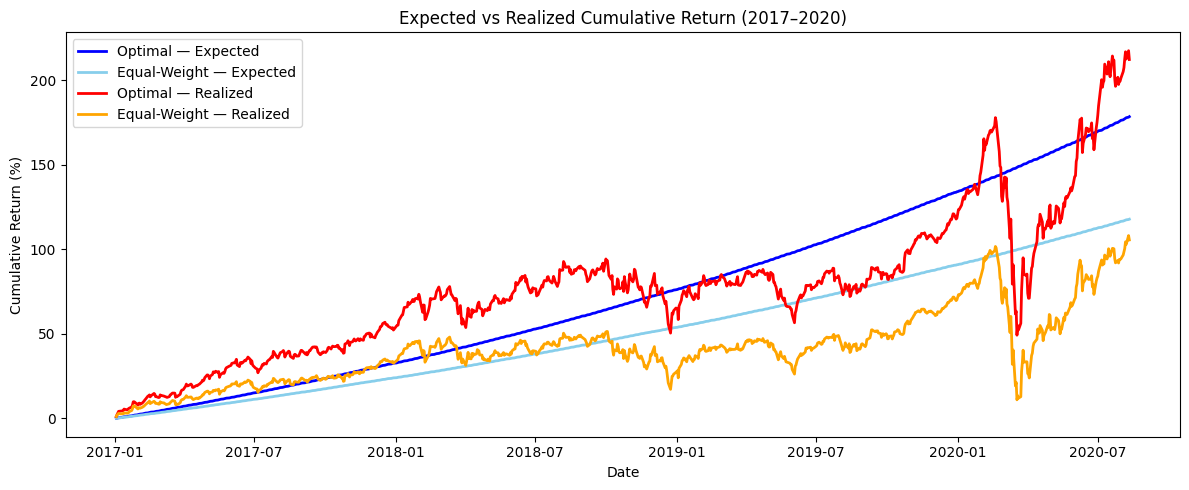

In [34]:
#Keep a date index for 2017–2020
dates_2 = df_returns.loc[df_returns['Date'] >= '2017-01-01', 'Date']
dates_2 = pd.to_datetime(dates_2).reset_index(drop=True)

# Realized cumulative return curves
opt_wealth_2 = (1 + pd.Series(daily_portfolio_ret)).cumprod()
eq_wealth_2  = (1 + pd.Series(eq_daily_portfolio_returns)).cumprod()

# Convert to cumulative return (%) instead of wealth
opt_realized_curve = (opt_wealth_2.values - 1.0) * 100.0
eq_realized_curve  = (eq_wealth_2.values  - 1.0) * 100.0

#Expected cumulative return curves implied by annualized expected returns from 2012–2016

# Using trading day as time
years = np.arange(len(dates_2)) / 252.0
opt_expected_curve = (np.exp(opt_exp_returns_1216 * years) - 1.0) * 100.0 #expecting that every year earn exponentially the computed return
eq_expected_curve  = (np.exp(eq_exp_returns_1216  * years) - 1.0) * 100.0 #expecting that every year earn exponentially the computed return


#Plot: four lines
plt.figure(figsize=(12, 5))

x = dates_2 if len(dates_2) == len(opt_realized_curve) else np.arange(len(opt_realized_curve))

# Expected (blue, skyblue)
plt.plot(x, opt_expected_curve, color="blue", linestyle="-", linewidth=2, label="Optimal — Expected")
plt.plot(x, eq_expected_curve, color="skyblue", linestyle="-", linewidth=2, label="Equal-Weight — Expected")

# Realized (red, orange)
plt.plot(x, opt_realized_curve, color="red", linestyle="-", linewidth=2, label="Optimal — Realized")
plt.plot(x, eq_realized_curve, color="orange", linestyle="-", linewidth=2, label="Equal-Weight — Realized")

plt.title("Expected vs Realized Cumulative Return (2017–2020)")
plt.xlabel("Date")
plt.ylabel("Cumulative Return (%)")
plt.legend()
plt.tight_layout()
plt.show()


When looking at the performance of the optimal portfolio in the second phase (2017–2020), we can see that both the expected and realized results clearly outperform the equal-weighted benchmark (each stock at 1/8). The realized optimal portfolio (red line) not only exceeded its own expected path but also stayed consistently above the equal-weight portfolio, despite experiencing larger fluctuations.

## Rebalancing portfolio each year

We defined a function that:
* Train on year t-1 using the simulate_potfolio_weights()
* Apply those weights to year t.

In [35]:
def yearly_rebalance(df_returns, num_sims=1000, risk_free_rate=0.0):

    df = df_returns.copy()
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date').reset_index(drop=True)
    df['Year'] = df['Date'].dt.year

    # select just the columns/assets that we need to build the portfolio from our dataframe
    asset_cols = [c for c in df.columns if c not in ('Date','Year','sp500')]

    years = sorted(df['Year'].unique())
    print(years)
    all_daily = []
    weights_rows = []

    for i in range(1, len(years)):
        y_train, y_test = years[i-1], years[i] #train = year t-1, test = year t

        #ensure the dataframe train and test contain the right columns
        train_df = df.loc[df['Year'] == y_train, ['Date']+asset_cols+( ['sp500'] if 'sp500' in df.columns else [] )]
        test_df  = df.loc[df['Year'] == y_test,  ['Date']+asset_cols+( ['sp500'] if 'sp500' in df.columns else [] )]

        if train_df.empty or test_df.empty:
            continue

        # Find optimal weights on training year
        max_stats, max_w, _ = simulate_portfolio_weights(train_df, num_sims=num_sims, risk_free_rate=risk_free_rate)

        # Align weights to asset order
        w = max_w.reindex(asset_cols).fillna(0.0).values

        # Apply on test year
        p_daily = test_df[asset_cols].values @ w
        all_daily.append(pd.Series(p_daily, index=test_df['Date'], name=y_test))

        # Save weights
        weights_rows.append(pd.Series(w, index=asset_cols, name=y_test))

    # Combine all yearly returns
    port_daily = pd.concat(all_daily).sort_index()
    wealth = (1.0 + port_daily).cumprod()

    # Performance stats
    years_total = len(port_daily)/252
    total_ret = wealth.iloc[-1]-1
    cagr = wealth.iloc[-1]**(1/years_total)-1
    vol = port_daily.std(ddof=1)*np.sqrt(252)
    sharpe = (cagr-risk_free_rate)/vol if vol>0 else np.nan

    stats = {"Total Return": total_ret,
             "CAGR": cagr,
             "Volatility": vol,
             "Sharpe": sharpe}
    weights_by_year = pd.DataFrame(weights_rows)
    weights_by_year.index.name="Invest_Year"

    return wealth, port_daily, stats, weights_by_year


In [36]:
#Run yearly rebalancing
wealth_rb, port_daily_rb, stats_rb, weights_rb = yearly_rebalance(df_returns, num_sims=10000, risk_free_rate=0.0)


[np.int32(2012), np.int32(2013), np.int32(2014), np.int32(2015), np.int32(2016), np.int32(2017), np.int32(2018), np.int32(2019), np.int32(2020)]


In [37]:
#Performance stats
print("Performance of yearly rebalanced strategy:")
for k, v in stats_rb.items():
    if k in ["Total Return", "CAGR", "Volatility"]:
        print(f"{k}: {v:.2%}")
    else:  # Sharpe
        print(f"{k}: {v:.2f}")

Performance of yearly rebalanced strategy:
Total Return: 185.45%
CAGR: 14.79%
Volatility: 22.37%
Sharpe: 0.66


In [38]:
# Weights for each year
print("\nWeights by invest year:")
print(weights_rb.round(3))


Weights by invest year:
              AAPL     BA      T    MGM   AMZN    IBM   TSLA   GOOG
Invest_Year                                                        
2013         0.206  0.046  0.245  0.006  0.287  0.108  0.042  0.059
2014         0.069  0.284  0.023  0.237  0.082  0.003  0.128  0.174
2015         0.464  0.207  0.018  0.005  0.060  0.037  0.183  0.026
2016         0.142  0.132  0.024  0.110  0.489  0.002  0.026  0.076
2017         0.160  0.004  0.272  0.243  0.018  0.265  0.001  0.036
2018         0.128  0.392  0.006  0.037  0.091  0.012  0.079  0.255
2019         0.025  0.185  0.013  0.024  0.344  0.053  0.202  0.156
2020         0.334  0.048  0.309  0.072  0.123  0.044  0.036  0.034


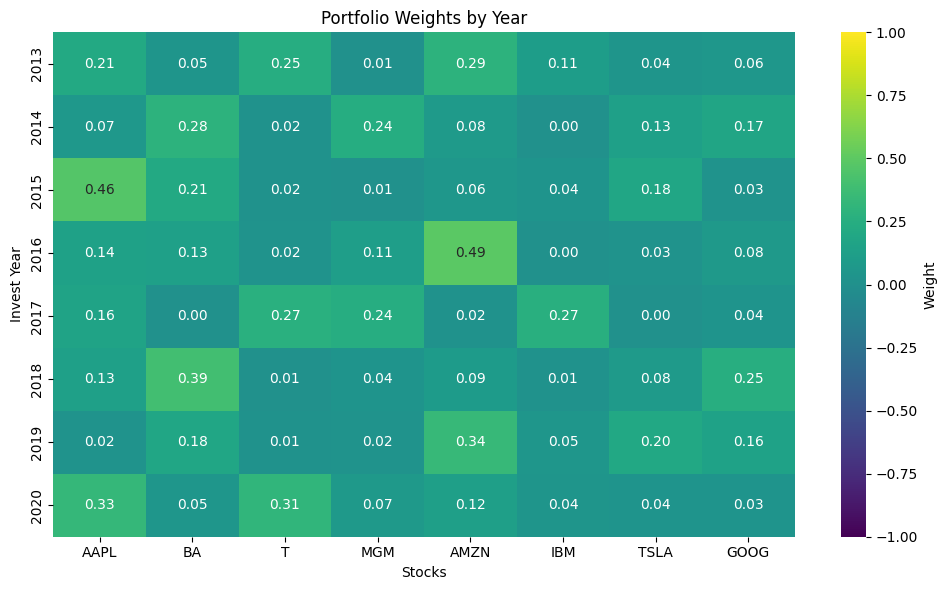

In [39]:
#heatmap of weights

plt.figure(figsize=(10,6))
sns.heatmap(weights_rb,
            annot=True, fmt=".2f", cmap="viridis",
            vmin=-1, vmax=1, cbar_kws={'label': 'Weight'})
plt.title("Portfolio Weights by Year")
plt.xlabel("Stocks")
plt.ylabel("Invest Year")
plt.tight_layout()
plt.show()

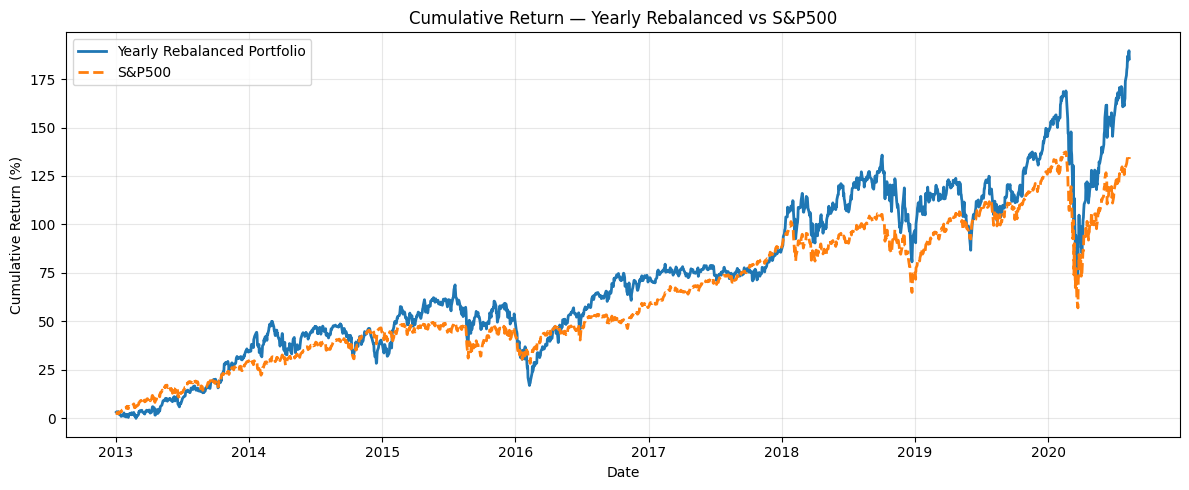

In [40]:
# Plot portfolio with yearly rebalance vs S&P500

# Extract sp500 daily returns
sp500_daily = df_returns.set_index('Date')['sp500']

# Align indices
aligned = pd.concat([port_daily_rb, sp500_daily], axis=1, join='inner')
aligned.columns = ['Rebalanced', 'S&P500']

# Compute cumulative returns (start at 0%)
cumulative_returns = (1 + aligned).cumprod() - 1

# Plot
plt.figure(figsize=(12,5))
plt.plot(cumulative_returns.index, cumulative_returns['Rebalanced']*100,
         label='Yearly Rebalanced Portfolio', lw=2)
plt.plot(cumulative_returns.index, cumulative_returns['S&P500']*100,
         label='S&P500', lw=2, linestyle='--')

plt.title("Cumulative Return — Yearly Rebalanced vs S&P500")
plt.xlabel("Date")
plt.ylabel("Cumulative Return (%)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


The yearly-rebalanced portfolio clearly outperformed the S&P 500 from 2013 to 2020, ending with a higher cumulative return (~190% vs. ~130%). This stronger growth comes at the cost of higher volatility. The difference is expected because the strategy invests in only 8 individual stocks, not a broad market basket of 500, and weights are actively recomputed each year based on past data, which tends to chase recent winners. As a result, the portfolio shows higher return potential but also greater concentration risk compared to the S&P500.